### 12-29-17

- basic example not encluded regularization

In [77]:
import numpy as np
import pandas as pd
%pylab inline 
from scipy.stats import norm as gaussian 
from scipy.misc import logsumexp

Populating the interactive namespace from numpy and matplotlib


# sample

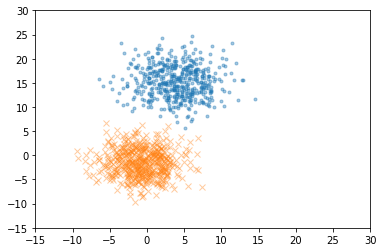

In [124]:
# Sample
X = gaussian.rvs(0,1,(2,500)) # generate 2x1000 standard normal (y,x)
V = X + np.array([[2],[4]]) # shift
X[:,:] *= 3 
X -= np.array([[1],[1.5]])
# Rotate Matrix 
f = +pi/14

R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
# Rotate
V = R.dot(V)*3.5

# plot
# figure(figsize=(5,5)); 
a,b = 15,30
xlim(-a,b);
ylim(-a,b);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(X[0,:],X[1,:], 'x', alpha=0.4) ;

In [125]:
X = np.concatenate((X,V),axis=1)
Y = np.concatenate((np.zeros((1,500)),np.ones((1,500))),axis=1)

In [126]:
shape(Y.T)

(1000, 1)

In [138]:
def logistic(y, x, w = None):
    
    i = 0
    maxIter = 1000
    alpha, count = 0.01, 0
    
    # reshape x
    X = np.insert(x, 0, 1, axis=1)
    size, predictors = shape(X)
    
    
    if w == None:
        w = np.zeros(predictors)
        
    
    while (i < maxIter) : # and abs(sum(w)) < predictors*5 :
        i += 1
           
        for j in xrange(size) :    
            
            expect_value = 1.0/(1+math.exp(-X[j].dot(w)))
            true_value = y[j]
            
            w = w - alpha * ( expect_value - true_value )*X[j]
            
            #alpha /= (1 + alpha*count)
            #count+=1
            
    return w
    
    

In [139]:
orderx = np.arange(-15.,20.,0.2)

In [140]:
w_hat = logistic(Y.T,X.T)
w_hat

array([-12.36147001,   0.59736838,   1.78128268])

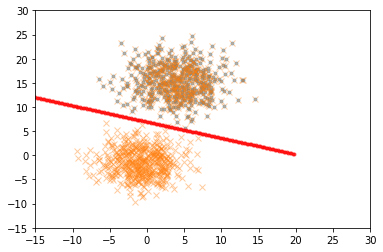

In [141]:
a,b = 15,30
xlim(-a,b);
ylim(-a,b);
plot(V[0,:],V[1,:], '.', alpha=0.4) ;
plot(X[0,:],X[1,:], 'x', alpha=0.4) ;
plot(orderx,(- orderx*w_hat[1] - w_hat[0])/w_hat[2], 'r.', alpha = 0.6 ) ;